#1.2 Assignment Description

1. Data Loading and Preprocessing (1 point)

(a) Load the Breast Cancer dataset from the “sklearn.datasets” module.

(b) Split the dataset into training and testing sets (80% training, 20% testing).

In [2]:
#a)
import sklearn as sk
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

bc = load_breast_cancer()

#b)
x = bc.data
y = bc.target
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)


2. Decision Tree Implementation (2 points)

(a) Import the DecisionTreeClassifier from “sklearn.tree”.

(b) Initialize the Decision Tree classifier with appropriate parameters.

(c) Train the model on the training set.

(d) Make predictions on the testing set.

(e) Evaluate the model using appropriate metrics including accuracy, precision, recall, and F1-score.

(f) Generate and display a confusion matrix.

Accuracy: 0.9474
Precision: 0.9577
Recall: 0.9577
F1-score: 0.9577


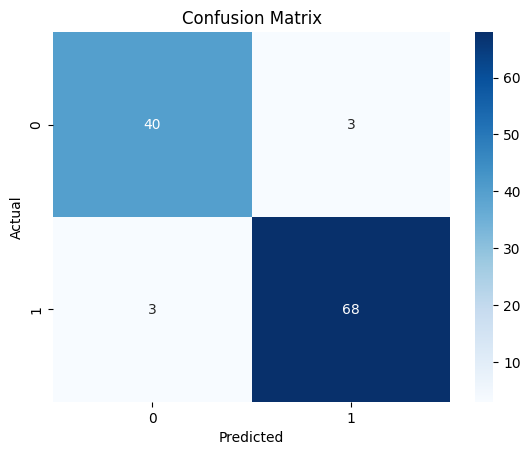

In [3]:
#a)
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns

#b)
dt_classifier = DecisionTreeClassifier(random_state=42)

#c)
dt_classifier.fit(x_train, y_train)

#d)
y_pred = dt_classifier.predict(x_test)

#e)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-score: {f1:.4f}')

#f)
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()




3. Random Forest Implementation (2 points)

(a) Import the RandomForestClassifier from “sklearn.ensemble”.

(b) Initialize the Random Forest classifier with appropriate parameters (e.g., number of trees, maximum depth).

(c) Train the model on the training set.

(d) Make predictions on the testing set.

(e) Evaluate the model using appropriate metrics including accuracy, precision, recall, and F1-score.

(f) Generate and display a confusion matrix.

Accuracy: 0.9649
Precision: 0.9589
Recall: 0.9859
F1-score: 0.9722


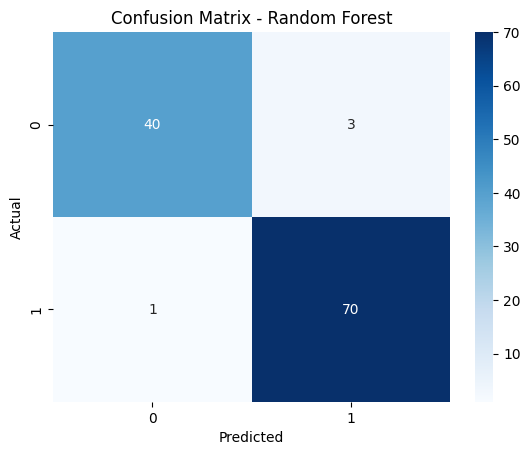

In [4]:
#a)
from sklearn.ensemble import RandomForestClassifier

#b)
rf_classifier = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)

#c)
rf_classifier.fit(x_train, y_train)

#d)
y_pred_rf = rf_classifier.predict(x_test)

#e)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

print(f'Accuracy: {accuracy_rf:.4f}')
print(f'Precision: {precision_rf:.4f}')
print(f'Recall: {recall_rf:.4f}')
print(f'F1-score: {f1_rf:.4f}')

#f)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.show()

4. Hyperparameter Tuning using Grid Search (2 points)

(a) Grid search is a technique for finding the optimal hyperparameters for a model. It works by exhaustively searching
through a specified parameter grid to determine the best combination of parameters based on cross-validation
performance. Experiment with different hyperparameters for the Random Forest (e.g., number of trees, maximum
depth, minimum samples split, minimum samples leaf) using GridSearchCV from “sklearn.model selection”.

(b) Use cross-validation to find the best set of hyperparameters.

(c) Train the Random Forest model with the optimal parameters found from grid search.

(d) Present the results of your tuning and explain which combination of hyperparameters worked best and why.

In [7]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

#a)
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_classifier = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

grid_search.fit(x_train, y_train)

print("Best Hyperparameters:", grid_search.best_params_)

#b)
grid_search.fit(x_train, y_train)

best_params = grid_search.best_params_

#c)
best_rf_classifier = RandomForestClassifier(**best_params, random_state=42)

best_rf_classifier.fit(x_train, y_train)

y_pred_best_rf = best_rf_classifier.predict(x_test)

accuracy_best_rf = accuracy_score(y_test, y_pred_best_rf)
precision_best_rf = precision_score(y_test, y_pred_best_rf)
recall_best_rf = recall_score(y_test, y_pred_best_rf)
f1_best_rf = f1_score(y_test, y_pred_best_rf)

print(f'Optimized Accuracy: {accuracy_best_rf:.4f}')
print(f'Optimized Precision: {precision_best_rf:.4f}')
print(f'Optimized Recall: {recall_best_rf:.4f}')
print(f'Optimized F1-score: {f1_best_rf:.4f}')

#d)
print("Best Hyperparameters found: ", best_params)
#This combination of hyperparameters allows a large amount of complexity to be captured, with which Random Forests are able to aggregate without significant overfitting.

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Hyperparameters found:  {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Optimized Accuracy: 0.9649
Optimized Precision: 0.9589
Optimized Recall: 0.9859
Optimized F1-score: 0.9722


5. Model Comparison (3 points)

(a) Compare the performance of the Decision Tree and Random Forest models using the evaluation metrics.

(b) Discuss which model performed better and why.

(c) Analyze the results to determine the impact of using an ensemble method (Random Forest) over a single model (Decision Tree).

In [8]:
#a)
#Decision tree:
#Accuracy: 0.9474
#Precision: 0.9577
#Recall: 0.9577
#F1-score: 0.9577

#Random Forest
#Accuracy: 0.9649
#Precision: 0.9589
#Recall: 0.9859
#F1-score: 0.9722

#b)
#Random Forest is more accurate, and has a notable improvement in recall, meaning it misses fewer true positives. The F1-score is higher too, meaning theres a better balance between precision and recall.

#c)
#Random forest performed better because it is an ensemble method. The larger sample size of decision trees rather than just one reduced variance overall.
#There is also more randomness, and random forest is less prone to overfitting because of the multiple trees that focus on different parts.